# Exploratory Analysis with Linear Regressions

Author: Daniel Dills


## Notebook Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

## Import Data

In [93]:
df = pd.read_csv("us_states.csv", error_bad_lines=False)

/Users/dillsd/Documents/Projects/CodeFellows/code401/labs/linear-regression/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## First five rows of data set

In [94]:
df.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


## Ensuring date column of Data Frame is converted into Date Time object

In [95]:
df["date"] = pd.to_datetime(df["date"])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27569 entries, 0 to 27568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    27569 non-null  datetime64[ns]
 1   state   27569 non-null  object        
 2   fips    27569 non-null  int64         
 3   cases   27569 non-null  int64         
 4   deaths  27569 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
27564,2021-07-16,Virginia,51,684499,11477
27565,2021-07-16,Washington,53,461401,6093
27566,2021-07-16,West Virginia,54,164933,2919
27567,2021-07-16,Wisconsin,55,680034,8209


In [96]:
wa_state = df[df["state"] == "Washington"]
print(wa_state)

            date       state  fips   cases  deaths
0     2020-01-21  Washington    53       1       0
1     2020-01-22  Washington    53       1       0
2     2020-01-23  Washington    53       1       0
4     2020-01-24  Washington    53       1       0
7     2020-01-25  Washington    53       1       0
...          ...         ...   ...     ...     ...
27345 2021-07-12  Washington    53  458724    6051
27400 2021-07-13  Washington    53  459282    6070
27455 2021-07-14  Washington    53  460015    6076
27510 2021-07-15  Washington    53  460730    6086
27565 2021-07-16  Washington    53  461401    6093

[543 rows x 5 columns]


## Arranging Data

In [97]:
X = wa_state["date"].values
y = wa_state["cases"].values

## # of Cases

In [98]:
len(X)

543

Month / Year

In [99]:
len(y)

543

In [100]:
X = X.reshape(-1, 1)
print(X)

[['2020-01-21T00:00:00.000000000']
 ['2020-01-22T00:00:00.000000000']
 ['2020-01-23T00:00:00.000000000']
 ['2020-01-24T00:00:00.000000000']
 ['2020-01-25T00:00:00.000000000']
 ['2020-01-26T00:00:00.000000000']
 ['2020-01-27T00:00:00.000000000']
 ['2020-01-28T00:00:00.000000000']
 ['2020-01-29T00:00:00.000000000']
 ['2020-01-30T00:00:00.000000000']
 ['2020-01-31T00:00:00.000000000']
 ['2020-02-01T00:00:00.000000000']
 ['2020-02-02T00:00:00.000000000']
 ['2020-02-03T00:00:00.000000000']
 ['2020-02-04T00:00:00.000000000']
 ['2020-02-05T00:00:00.000000000']
 ['2020-02-06T00:00:00.000000000']
 ['2020-02-07T00:00:00.000000000']
 ['2020-02-08T00:00:00.000000000']
 ['2020-02-09T00:00:00.000000000']
 ['2020-02-10T00:00:00.000000000']
 ['2020-02-11T00:00:00.000000000']
 ['2020-02-12T00:00:00.000000000']
 ['2020-02-13T00:00:00.000000000']
 ['2020-02-14T00:00:00.000000000']
 ['2020-02-15T00:00:00.000000000']
 ['2020-02-16T00:00:00.000000000']
 ['2020-02-17T00:00:00.000000000']
 ['2020-02-18T00:00:

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

## Validate Shape of test/train data

In [102]:
print(f'x-train shape [{x_train.shape}]')

x-train shape [(434, 1)]


In [103]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


In [104]:
print(f'x-test shape [{x_test.shape}]')

x-test shape [(109, 1)]


In [105]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


## Plotting Data to display

Text(0.5, 1.0, 'Covid Cases in Washington State by Month')

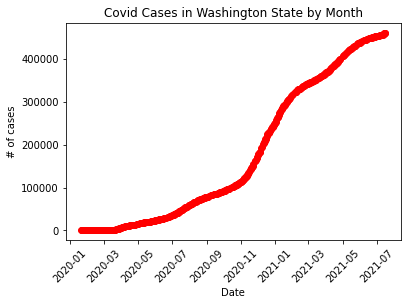

In [106]:
plt.xticks(rotation=45)
plt.scatter(x_train, y_train, color='red')
plt.xlabel("Date")
plt.ylabel("# of cases")
plt.title("Covid Cases in Washington State by Month")

In [108]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)